In [1]:
import pandas as pd
from metabolics_slips_trips.loader import *
from metabolics_slips_trips.helper import *
from metabolics_slips_trips.plots import *
import matplotlib.pyplot as plt


In [2]:
# TODO: add path to your data folder here
data = "../../data/"

In [3]:
ds = DatasetVo2(data)

In [4]:
ds.create_index() #iterates through participant folders and creates an overview of all trials that were recorded

,id,trial,magnitude
0,S1,trial1,-0.8
1,S1,trial2,0.6
2,S1,trial3,-0.6
3,S1,trial4,-0.4
4,S1,trial5,0.8
5,S1,trial6,0.4
6,S2,trial1,0.8
7,S2,trial2,0.4
8,S2,trial3,-0.4
9,S2,trial4,0.6


### example of how to load one trial + access the data

In [5]:
trial1 = ds[0]

data from the metabolic measurement

In [6]:
metabolic_data = trial1.vo2_data
metabolic_data

../../data/S1
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


,VO2,VO2/kg,METS,VCO2,VE,RER,RR,Vt,FEO2,FECO2,HR,AcKcal,AcVO2,AcVCO2,Breath#,#Samps,#Samps .1
440.90,0.317454,3.879994,1.108570,0.234819,11.841033,0.739695,14.888337,0.795323,17.838385,2.466856,74.0,11.371525,2.364158,1.955734,91.0,0.0,0.0
444.57,0.237732,2.905618,0.830176,0.175241,8.843861,0.737134,16.348774,0.540949,17.831888,2.464898,74.0,11.440027,2.378700,1.966453,92.0,0.0,0.0
448.30,0.262121,3.2037,0.915343,0.19298,9.713987,0.736227,16.085791,0.603886,17.820629,2.471177,72.0,11.516774,2.394995,1.978450,93.0,0.0,0.0
450.70,0.199158,2.434152,0.695472,0.14655,7.408305,0.73585,25.000000,0.296332,17.832542,2.460855,72.0,11.554290,2.402961,1.984312,94.0,0.0,0.0
455.92,0.233659,2.855834,0.815952,0.171641,8.709332,0.734578,11.494253,0.757712,17.839710,2.451779,77.0,11.649998,2.423289,1.999244,95.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095.55,0.629271,7.691096,2.197456,0.552343,19.764267,0.877749,19.169329,1.031036,17.143934,3.459721,82.0,49.112610,10.312366,8.085799,307.0,0.0,0.0
1098.40,0.724217,8.851542,2.529012,0.633683,22.790962,0.874991,21.052631,1.082571,17.153614,3.442304,81.0,49.279877,10.346766,8.115899,308.0,0.0,0.0
1101.01,0.650563,7.95132,2.271806,0.568,20.345930,0.873091,22.988506,0.885048,17.131512,3.456133,81.0,49.417427,10.375066,8.140607,309.0,0.0,0.0
1103.99,0.754634,9.223309,2.635231,0.653385,23.658840,0.86583,20.134228,1.175056,17.146801,3.419415,82.0,49.599297,10.412546,8.173059,310.0,0.0,0.0


all columns can be accessed sepearately, like this:

In [7]:
hr = metabolic_data.HR
vo2 = metabolic_data.VO2

load grf data (vertical GRF only)

In [8]:
grf_data = trial1.grf_data
grf_data

,fy_left,fy_right
0.000,544.054528,275.066391
0.001,544.229521,274.732589
0.002,544.409946,274.390977
0.003,544.595797,274.041925
0.004,544.787036,273.685801
...,...,...
668.125,488.779712,333.101480
668.126,488.765219,333.105733
668.127,488.751773,333.109439
668.128,488.739507,333.112604


load the times of the perturbations (since trial start)

In [9]:
perturbation_times = trial1.impulse_times
np.sort(perturbation_times)

array([ 497.671,  558.479,  619.426,  680.775,  742.236,  804.285,
        865.125,  926.894,  988.076, 1049.254])

load the times of the first ground contact after each perturbation (check if this is correct, sometimes they dont get recognized)

In [10]:
np.sort(trial1.hs_after_perturbation_times)

array([ 498.139,  619.917,  681.26 ,  742.714,  804.755,  865.61 ,
        927.366,  988.54 , 1049.722])

### compute the response to the perturbations

here e.g. for vo2 and for hr (computes from 10s before perturbation to 45s after perturbation)

In [11]:
all_responses_vo2 = all_responses(vo2, perturbation_times)
all_responses_hr = all_responses(hr, perturbation_times)

or for metabolic cost:

In [12]:
met_rate = metabolic_cost(vo2, metabolic_data.VCO2)

In [13]:
all_responses_met_rate = all_responses(met_rate, perturbation_times)

to get only the mean response:

In [14]:
mean_vo2_response = average_response(all_responses_vo2)

### make some plots

Text(0, 0.5, 'vo2 [L/min]')

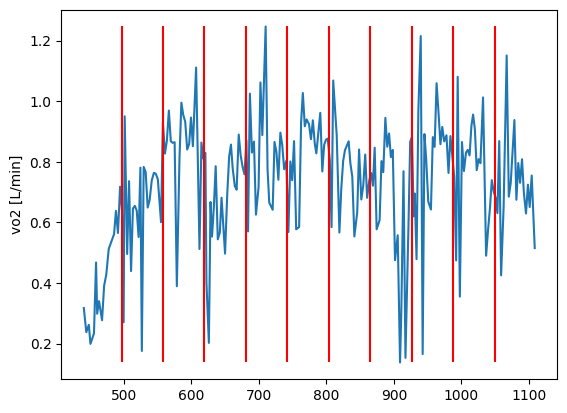

In [16]:
plt.figure()
plt.plot(vo2)
plt.vlines(perturbation_times, min(vo2), max(vo2), color='r')
plt.ylabel("vo2 [L/min]")

plot the average and individual responses

/home/rzlin/ys64ofuj/metabolics_slips_trips/src/metabolics_slips_trips/plots.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([t/100 for t in ticks])


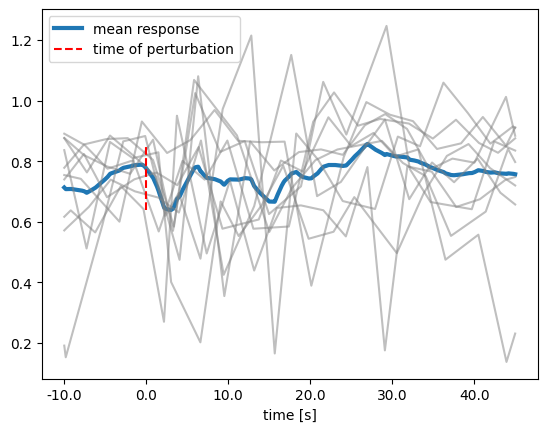

In [25]:
fig = plot_response(all_responses_vo2) #for vo2

/home/rzlin/ys64ofuj/metabolics_slips_trips/src/metabolics_slips_trips/plots.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([t/100 for t in ticks])


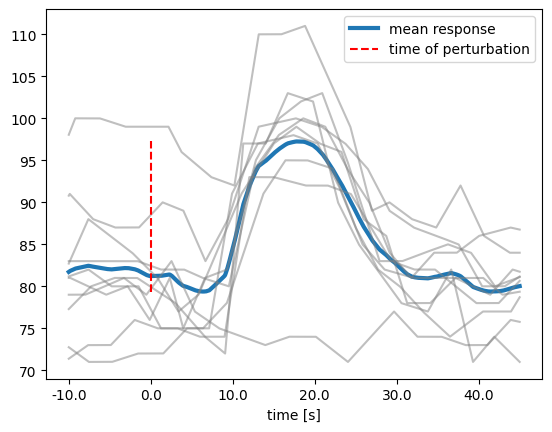

In [26]:
fig2 = plot_response(all_responses_hr)

/home/rzlin/ys64ofuj/metabolics_slips_trips/src/metabolics_slips_trips/plots.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([t/100 for t in ticks])


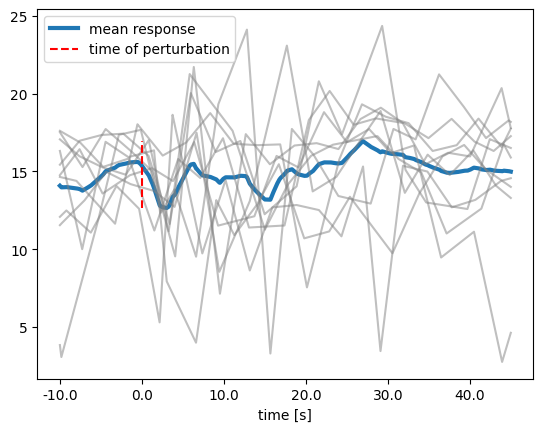

In [27]:
fig3 = plot_response(all_responses_met_rate)